## Import Library

In [196]:
import numpy as np
import pandas as pd

#from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## load dataset

In [198]:
data = pd.read_csv(r'/content/drive/MyDrive/imbalance/kidn_class50re_orig.csv')

In [199]:
data.head()

,do_age,gfr_in,speed,Y
0,61.0,91.23,-0.197095,0
1,62.0,25.10,0.247069,1
2,53.0,81.34,-0.370439,1
3,44.0,55.61,-0.138711,1
4,15.0,94.03,-0.396307,0


In [200]:
data.shape
data.Y.value_counts()

0    214
1    148
Name: Y, dtype: int64

In [201]:
# separate failures and non failures
data_0 = data[data['Y'] == 0]
data_1 = data[data['Y'] == 1]

In [202]:
data_0 = data_0.sample(n=214)

In [203]:
data = data_1.append(data_0)

data.Y.value_counts()

<ipython-input-203-96df2dc7510c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_1.append(data_0)


0    214
1    148
Name: Y, dtype: int64

In [204]:
# check the number of 1s and 0s
count = data['Y'].value_counts()

print('Failed "1" :', count[1])
print('Not Failed "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Failed "1" : 148
Not Failed "0": 214
69.1588785046729


In [205]:
# check for null values
data.isnull().sum()

do_age    0
gfr_in    0
speed     0
Y         0
dtype: int64

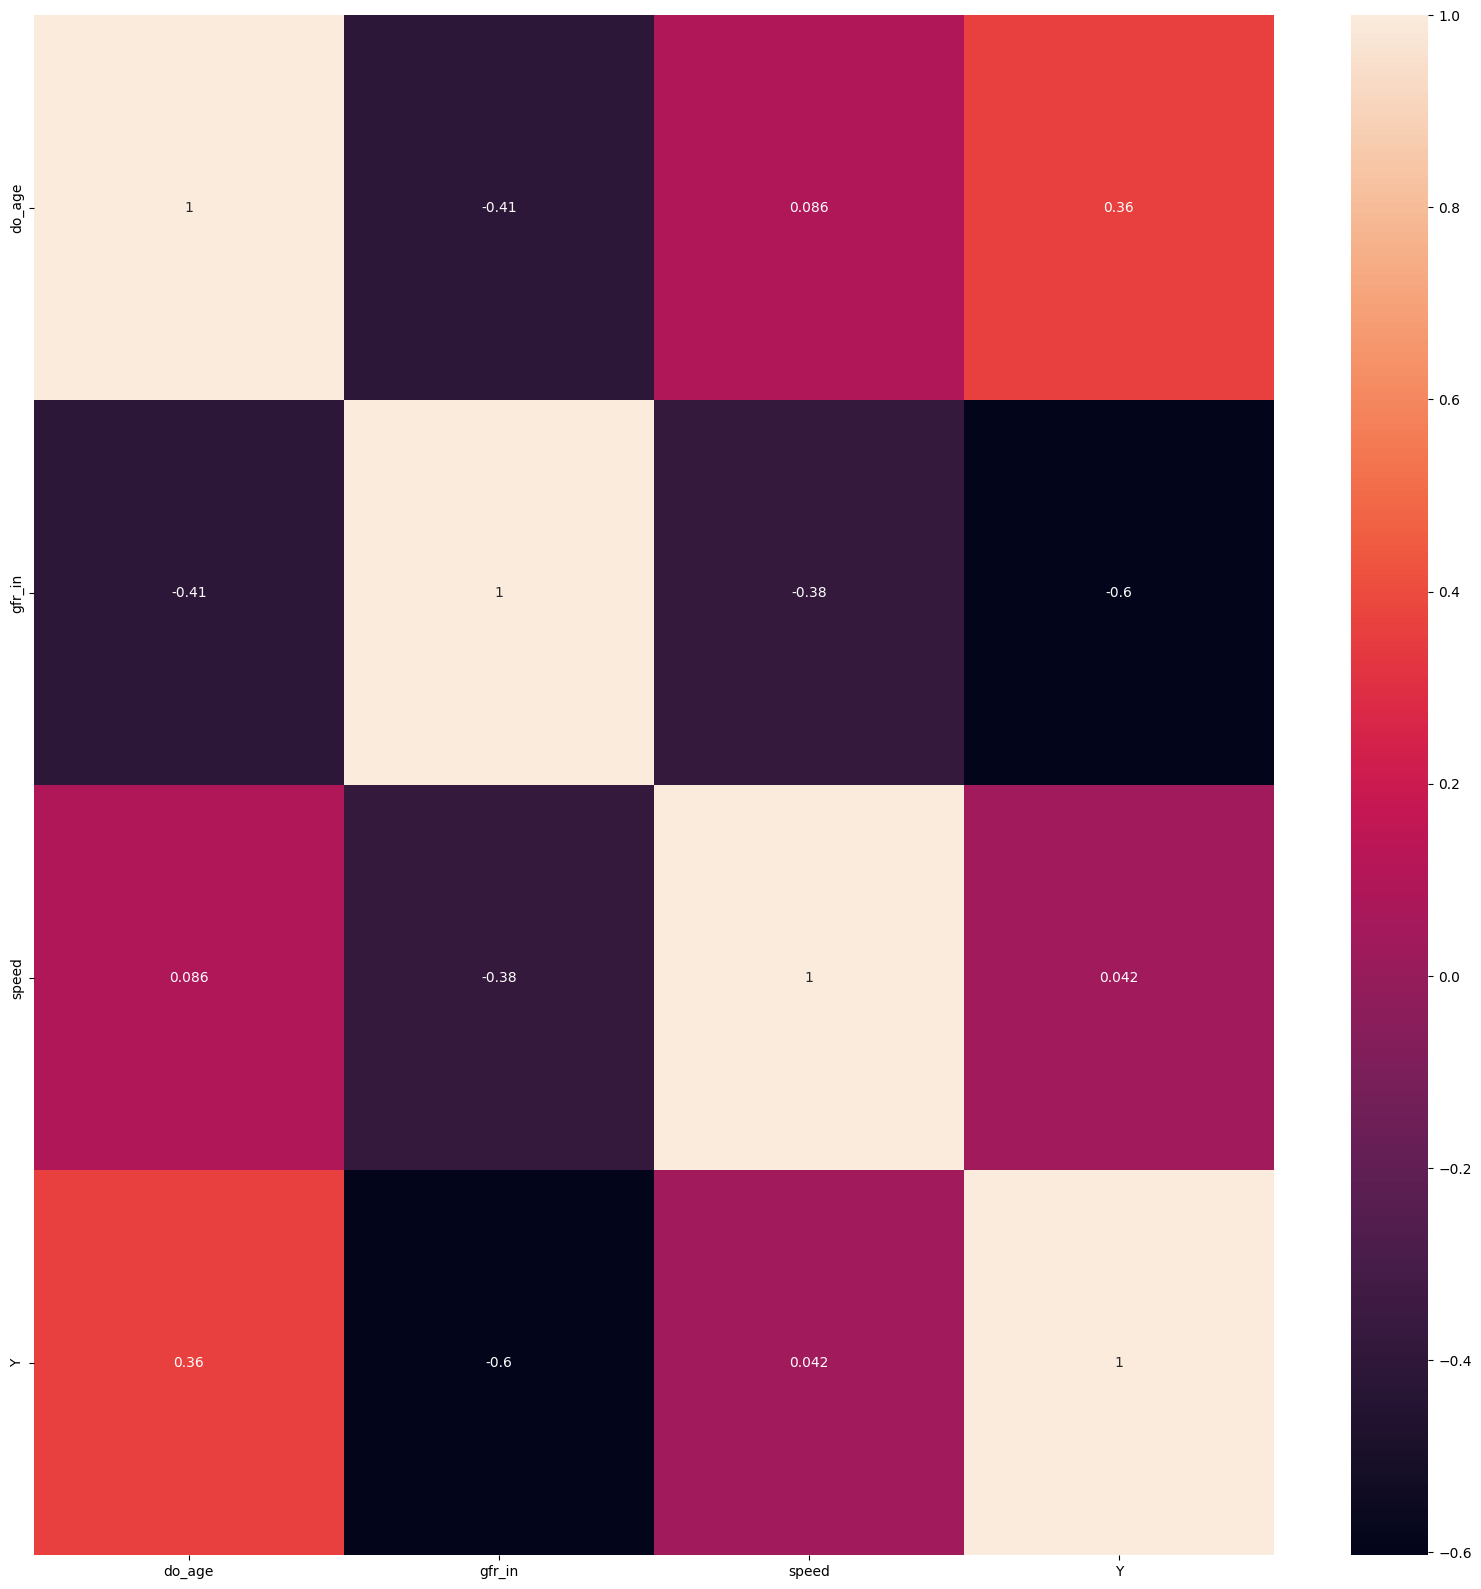

In [206]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Respose and Target variable

In [207]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(148, 214)

## Train test split

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Fit the model uing Logitic Regression

In [209]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

In [210]:
accuracy_score(y_predict, y)

0.8287292817679558

In [211]:
np.unique(y_predict)

array([0, 1])

## The matrix trap

In [212]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 0.8348623853211009
Roc auc scote: 0.8336783988957903
F1 core: 0.8085106382978724


In [213]:
confusion_matrix(xgb_y_predict, y_test)

array([[53, 10],
       [ 8, 38]])

##  Resampling Technique

In [214]:
# class count
class_count_0, class_count_1 = data['Y'].value_counts()

# divie class
class_0 = data[data['Y'] == 0]
class_1 = data[data['Y'] == 1]

In [215]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (214, 4)

class 1: (148, 4)


## 1. Random under sampling

total class of 1 and 0:
 0    148
1    148
Name: Y, dtype: int64


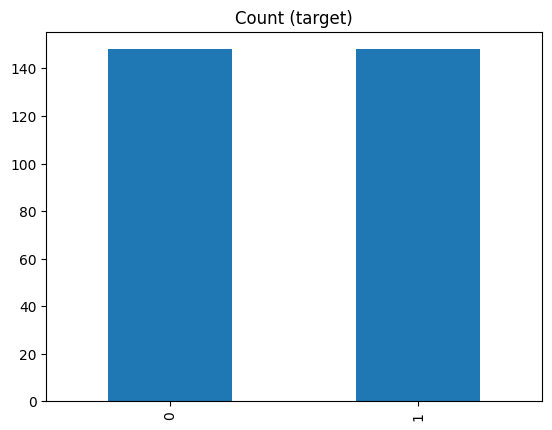

In [216]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Y'].value_counts())

test_under['Y'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling

class count of 1 and 0:
 1    214
0    214
Name: Y, dtype: int64


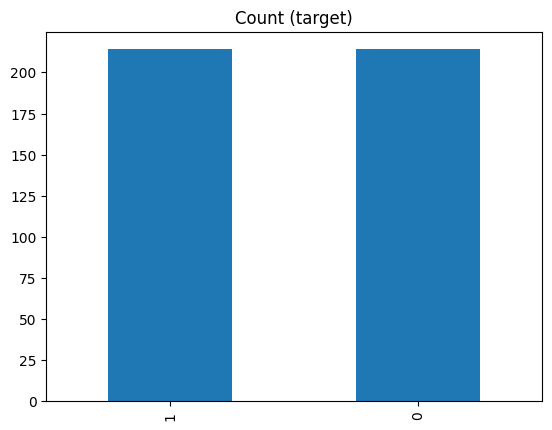

In [217]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Y'].value_counts())

# plot the count
test_under['Y'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [218]:
# import library
import imblearn

## 3. Random under-sampling with imblearn

In [219]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 214, 1: 148})
Resample dataset shape Counter({0: 148, 1: 148})


## 4.Random over-sampling with imblearn

In [220]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 214, 1: 148})
Resample dataset shape Counter({1: 214, 0: 214})


## 5. under-sampling Tomek links

## 6. Synthetic minority over-sampleing technique

In [221]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 214, 1: 148})
Resampple dataset shape: Counter({1: 214, 0: 214})


## 7. NearMiss

In [222]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 214, 1: 148})
Resample dataset shape: Counter({0: 148, 1: 148})


## 8. Change the performance metric

In [223]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.30, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.718974358974359
Accuracy score: 0.7191011235955056
F1 score: 0.691358024691358


## 9. Tree based algorithm

In [224]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [225]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.8198428961748634
Accuracy score: 0.8256880733944955
F1 score: 0.7956989247311829
